## NLP with machine/deep learning

In [30]:
import pandas as pd

df = pd.read_excel('Data/future_sentence.xlsx', index_col=0, engine='openpyxl')
df.head()

,Sentence
0,"총 규모가 3707억원에 달하는 이번 사업은 실시간 원격 수업, 가상현실(VR), ..."
1,올해 대구미래역량교육 등 주요 교육정책을 설명하고 공직기강 확립을 위한 공직자 비위...
2,"기후위기·환경재난 대응, 그린 스마트 미래학교 구축 전담부서 신설 본청 인원 감축 ..."
3,"그리고, 기후위기·환경재난시대 대응을 위한 기후환경교육 강화, 그린 스마트 미래학교..."
4,"박종훈 교육감은 “2021년은 경남교육의 대전환이 시작되는 해로, 이번 조직개편은 ..."


## Tokenizer

In [31]:
# NTLK를 통한 워드 토크나이저
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

print(df.Sentence[1])
print(word_tokenize(df.Sentence[1]))

okt = Okt()

okt.morphs(df.Sentence[1])

올해 대구미래역량교육 등 주요 교육정책을 설명하고 공직기강 확립을 위한 공직자 비위행위 근절 교육을 한다.
['올해', '대구미래역량교육', '등', '주요', '교육정책을', '설명하고', '공직기강', '확립을', '위한', '공직자', '비위행위', '근절', '교육을', '한다', '.']


['올해',
 '대구',
 '미래',
 '역량',
 '교육',
 '등',
 '주요',
 '교육',
 '정책',
 '을',
 '설명',
 '하고',
 '공직',
 '기강',
 '확립',
 '을',
 '위',
 '한',
 '공직자',
 '비위',
 '행위',
 '근절',
 '교육',
 '을',
 '한다',
 '.']

In [32]:
okt.pos(df.Sentence[1])

[('올해', 'Noun'),
 ('대구', 'Noun'),
 ('미래', 'Noun'),
 ('역량', 'Noun'),
 ('교육', 'Noun'),
 ('등', 'Noun'),
 ('주요', 'Noun'),
 ('교육', 'Noun'),
 ('정책', 'Noun'),
 ('을', 'Josa'),
 ('설명', 'Noun'),
 ('하고', 'Josa'),
 ('공직', 'Noun'),
 ('기강', 'Noun'),
 ('확립', 'Noun'),
 ('을', 'Josa'),
 ('위', 'Noun'),
 ('한', 'Josa'),
 ('공직자', 'Noun'),
 ('비위', 'Noun'),
 ('행위', 'Noun'),
 ('근절', 'Noun'),
 ('교육', 'Noun'),
 ('을', 'Josa'),
 ('한다', 'Verb'),
 ('.', 'Punctuation')]

In [33]:
pos = okt.pos(df.Sentence[1])

nouns = []
for t in pos:
    if (t[1] == 'Noun'):
        nouns.append(t[0])

print(nouns)

['올해', '대구', '미래', '역량', '교육', '등', '주요', '교육', '정책', '설명', '공직', '기강', '확립', '위', '공직자', '비위', '행위', '근절', '교육']


In [5]:
!python3 -m spacy download en_core_web_lg

2021-12-20 21:53:30.561436: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 778.8 MB 40 kB/s  eta 0:00:015|████▏                           | 100.4 MB 652 kB/s eta 0:17:21     |███████████████▍                | 374.8 MB 470 kB/s eta 0:14:19     |████████████████████            | 489.4 MB 473 kB/s eta 0:10:12     |███████████████████████████████▎| 762.1 MB 624 kB/s eta 0:00:27
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [34]:
import spacy

nlp = spacy.load('en_core_web_lg')
text = 'My life is in your hands.'
doc = nlp(text)

for token in doc:
    print((token.text, token.pos_))

('My', 'DET')
('life', 'NOUN')
('is', 'AUX')
('in', 'ADP')
('your', 'DET')
('hands', 'NOUN')
('.', 'PUNCT')


In [35]:
from nltk.corpus import stopwords 

stopwords.words('english')[:10] #불용어 중 10개를 출력한다.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [36]:
import nltk
stemmer = nltk.stem.porter.PorterStemmer()
print(stemmer.stem('acted'), stemmer.stem('acts'))

act act


## Vectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ['나는 학교가 학교가 좋다', '학교가 너를 부른다', '나는 너를 부른다']
cnt_vec = CountVectorizer()
cnt_vec.fit(texts)
print(cnt_vec.vocabulary_)
print(cnt_vec.transform([texts[0]]).toarray())

{'나는': 0, '학교가': 4, '좋다': 3, '너를': 1, '부른다': 2}
[[1 0 0 1 2]]


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
tfidf_vec.fit(texts)
print(tfidf_vec.vocabulary_)
print(tfidf_vec.transform(texts).toarray())

{'나는': 0, '학교가': 4, '좋다': 3, '너를': 1, '부른다': 2}
[[0.38550292 0.         0.         0.50689001 0.77100584]
 [0.         0.57735027 0.57735027 0.         0.57735027]
 [0.57735027 0.57735027 0.57735027 0.         0.        ]]


In [41]:
import tensorflow as tf
from tensorflow.keras import preprocessing

samples = ['수학을 배우는 것은 매우 즐겁다', '수학 시간이 되면 행복해', '수학 시간이 기다려져',
          '수학은 어려워서 배우고 싶지 않아', '수학은 재미없어']
labels = [[1], [1], [1], [0], [0]]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_index = tokenizer.word_index

In [42]:
word_index

{'수학': 1,
 '시간이': 2,
 '수학은': 3,
 '수학을': 4,
 '배우는': 5,
 '것은': 6,
 '매우': 7,
 '즐겁다': 8,
 '되면': 9,
 '행복해': 10,
 '기다려져': 11,
 '어려워서': 12,
 '배우고': 13,
 '싶지': 14,
 '않아': 15,
 '재미없어': 16}

In [43]:
sequences

[[4, 5, 6, 7, 8], [1, 2, 9, 10], [1, 2, 11], [3, 12, 13, 14, 15], [3, 16]]

In [44]:
## 벡터의 길이가 다를 때는 길이를 맞추는 작업을 해야 한다. (Padding)
### 제일 긴 길이에 맞춰서 짧은 것들을 늘리는 방법 (0, ? 등으로 채우기)
### 특정 길이로 알아서 맞추는 방법 (길이가 긴 것은 잘라내야!)

## Word2Vec

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

df = pd.read_excel('Data/future_sentence.xlsx', index_col=0, engine='openpyxl')

In [16]:
!pip install 'git+https://github.com/ssut/py-hanspell.git'

    ERROR: Command errored out with exit status 1:
     command: /home/user/anaconda3/envs/nlp2/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-itpyef9i/py-hanspell_c711fbe5736e4ed0961340aa17baea38/setup.py'"'"'; __file__='"'"'/tmp/pip-install-itpyef9i/py-hanspell_c711fbe5736e4ed0961340aa17baea38/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-pbt15wen
         cwd: /tmp/pip-install-itpyef9i/py-hanspell_c711fbe5736e4ed0961340aa17baea38/
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-itpyef9i/py-hanspell_c711fbe5736e4ed0961340aa17baea38/setup.py", line 2, in <module>
        from pip.req

In [3]:
%%time
# 교정을 하고자 할 때는 수행하는 명령어
# 수행된 결과를 확인하고 수행하는 것이 좋다.
# 이 코드는 반드시 실행할 필요는 없다.

from hanspell import spell_checker

try:
    for i in range(len(df)):
        t = df.Sentence[i].replace('&', ' ')
        result = spell_checker.check(t)
        # 0-result, 1-original, 2-revised, 3-error number, 4-checked words, 5-time
        df.Sentence[i] = result[2]
        
except Exception as e:
    print(i)
    print(df.Sentence[i])

CPU times: user 35 s, sys: 601 ms, total: 35.6 s
Wall time: 4min 22s


In [6]:
%%time
from konlpy.tag import Kkma

# 형태소 분석기 꼬꼬마를 사용한 토큰화 작업 (다소 시간 소요)
kkma = Kkma()

stopwords = ['ㆍ', 'ㄴ', '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
tokenized_data = []
for sentence in df['Sentence']:
    temp_X = kkma.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if (not word in stopwords) and (len(word) > 1)] # 불용어 제거
    tokenized_data.append(temp_X)

CPU times: user 9min 9s, sys: 7.04 s, total: 9min 16s
Wall time: 2min 29s


문장 최대 길이 : 89
문장 평균 길이 : 25.326416600159618


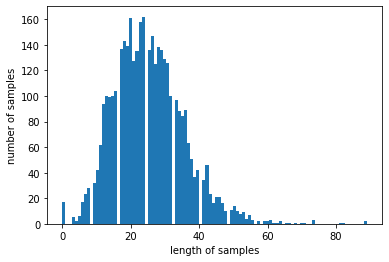

In [5]:
# 리뷰 길이 분포 확인
print('문장 최대 길이 :',max(len(l) for l in tokenized_data))
print('문장 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [47]:
from gensim.models import Word2Vec
import multiprocessing

num_scores = multiprocessing.cpu_count()
print('CPU Processor count:', num_scores)
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=10, workers=num_scores, sg=0)
# size: 벡터 크기, window: 고려할 앞뒤 폭, min_count: 단어의 최소 빈도, 
# workers: CPU 코어 수, sg: 0-CBOW, 1-skip-gram

[gensim.models.word2vec] collecting all words and their counts
[gensim.models.word2vec] PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
[gensim.models.word2vec] collected 5598 word types from a corpus of 99301 raw words and 3759 sentences
[gensim.models.word2vec] Creating a fresh vocabulary
[gensim.utils] Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 1268 unique words (22.650946766702393%% of original 5598, drops 4330)', 'datetime': '2021-12-21T00:33:23.044202', 'gensim': '4.1.2', 'python': '3.7.0 (default, Oct  9 2018, 10:31:47) \n[GCC 7.3.0]', 'platform': 'Linux-5.4.0-91-generic-x86_64-with-debian-bullseye-sid', 'event': 'prepare_vocab'}
[gensim.utils] Word2Vec lifecycle event {'msg': 'effective_min_count=10 leaves 87682 word corpus (88.29921148830324%% of original 99301, drops 11619)', 'datetime': '2021-12-21T00:33:23.045393', 'gensim': '4.1.2', 'python': '3.7.0 (default, Oct  9 2018, 10:31:47) \n[GCC 7.3.0]', 'platform': 'Linux-5.4.0-91-generic-

CPU Processor count: 80


[gensim.models.word2vec] worker thread finished; awaiting finish of 77 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 76 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 75 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 74 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 73 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 72 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 71 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 70 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 69 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 68 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 67 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 66 more 

[gensim.models.word2vec] worker thread finished; awaiting finish of 60 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 59 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 58 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 57 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 56 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 55 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 54 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 53 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 52 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 51 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 50 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 49 more 

[gensim.models.word2vec] worker thread finished; awaiting finish of 43 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 42 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 41 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 40 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 39 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 38 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 37 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 36 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 35 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 34 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 33 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 32 more 

[gensim.models.word2vec] worker thread finished; awaiting finish of 26 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 25 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 24 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 23 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 22 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 21 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 20 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 19 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 18 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 17 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 16 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 15 more 

[gensim.models.word2vec] worker thread finished; awaiting finish of 9 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 8 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 7 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 6 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 5 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 4 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 3 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 2 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 1 more threads
[gensim.models.word2vec] worker thread finished; awaiting finish of 0 more threads
[gensim.models.word2vec] EPOCH - 5 : training on 99301 raw words (67865 effective words) took 0.2s, 338873 effective words/s
[gensim.utils] Word2Vec lifecycle event {'msg

In [48]:
model.wv.vectors.shape

(1268, 100)

In [49]:
model.wv.most_similar('미래', topn=10)

[('준비', 0.9734072685241699),
 ('사회', 0.9709550738334656),
 ('어서', 0.9699923992156982),
 ('격차', 0.9680209159851074),
 ('능동적', 0.96771639585495),
 ('패러다임', 0.9676910042762756),
 ('필요', 0.9661951661109924),
 ('방향', 0.9661369919776917),
 ('재난', 0.964096188545227),
 ('새롭', 0.9624149203300476)]

In [50]:
# 미래 : 혁신 = 현재 : ? 의 관계를 추론함
model.wv.most_similar(positive=['현재', '혁신'], negative=['미래'])

[('우수', 0.967003583908081),
 ('공동', 0.96213299036026),
 ('행복', 0.9610649347305298),
 ('특성', 0.9594506621360779),
 ('경계', 0.957349956035614),
 ('생태계', 0.9568615555763245),
 ('시범', 0.9564274549484253),
 ('통합', 0.9551608562469482),
 ('참여', 0.9537057876586914),
 ('배움터', 0.9535694122314453)]

In [51]:
# 미래 : 인공지능 = 현재 : ? 의 관계를 추론함
model.wv.most_similar(positive=['현재', '인공지능'], negative=['미래'])

[('정보', 0.9722699522972107),
 ('통신', 0.9679960012435913),
 ('연구원', 0.9671671390533447),
 ('제작', 0.9661020636558533),
 ('포스', 0.9650522470474243),
 ('진로', 0.9643911123275757),
 ('클라우드', 0.9638974666595459),
 ('KT', 0.9635820388793945),
 ('서울대', 0.9635558128356934),
 ('카드', 0.963344931602478)]

In [52]:
model.wv['인공지능']

array([-0.14523031,  0.12684086,  0.3622336 ,  0.00080377, -0.11707473,
       -0.5347844 ,  0.15661815,  0.41244814, -0.30105382, -0.28043535,
       -0.02788373, -0.39011633, -0.20928517,  0.33228403,  0.16964014,
       -0.01276359, -0.03041913, -0.32095188, -0.4803242 , -0.54192257,
        0.36061546,  0.19785653,  0.29861158, -0.12352118,  0.01411524,
        0.16953918,  0.10530762,  0.13832359, -0.21647033,  0.04398575,
        0.1403959 ,  0.09389833,  0.19760953, -0.08701472, -0.2416509 ,
        0.41690913,  0.08640269, -0.12335932, -0.0331782 , -0.6305584 ,
       -0.16338639, -0.2741315 , -0.27380103, -0.10204238,  0.32513916,
        0.06207157, -0.08190104,  0.17377084,  0.07448626,  0.44055182,
       -0.02348898, -0.13430294, -0.10232621, -0.42580685, -0.09574471,
        0.21248794,  0.05073497,  0.19155852, -0.24045615,  0.24812135,
        0.06971984, -0.31866616,  0.23041706, -0.14739163, -0.26326334,
        0.29061535,  0.30696917,  0.605934  , -0.46516114,  0.55

## Word2Vec 시각화

In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import rc

# 한글 깨짐을 방지하는 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def tsne_plot(model, vocab):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    main_words = ['미래', '가상현실', '혁신', 
                  '빅데이터', '교육', '발전', '역량', '인공지능']

    for word in vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(
        perplexity=40, n_components=2, init='pca', n_iter=2500, 
        random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 16)) 
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        if labels[i] in main_words:
            plt.annotate(
                labels[i], xy=(x[i], y[i]), xytext=(5, 2), 
                textcoords='offset points', ha='right', 
                va='bottom', fontweight='extra bold', fontsize=11)
    plt.show()

In [ ]:
tsne_plot(model.wv, model.wv.key_to_index)

In [13]:
model.wv.save_word2vec_format('vec_future.txt', binary=False)

In [14]:
# 시각화를 위한 tsv 생성 과정
!python -m gensim.scripts.word2vec2tensor --input vec_future.txt --output vec_future

2021-12-20 23:14:42,986 - word2vec2tensor - INFO - running /home/user/anaconda3/envs/nlp3/lib/python3.7/site-packages/gensim/scripts/word2vec2tensor.py --input vec_future.txt --output vec_future
2021-12-20 23:14:42,986 - keyedvectors - INFO - loading projection weights from vec_future.txt
2021-12-20 23:14:43,080 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (1223, 100) matrix of type float32 from vec_future.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-12-20T23:14:43.072739', 'gensim': '4.1.2', 'python': '3.7.0 (default, Oct  9 2018, 10:31:47) \n[GCC 7.3.0]', 'platform': 'Linux-5.4.0-91-generic-x86_64-with-debian-bullseye-sid', 'event': 'load_word2vec_format'}
2021-12-20 23:14:43,163 - word2vec2tensor - INFO - 2D tensor file saved to vec_future_tensor.tsv
2021-12-20 23:14:43,163 - word2vec2tensor - INFO - Tensor metadata file saved to vec_future_metadata.tsv
2021-12-20 23:14:43,163 - word2vec2tensor - INFO - finished running word2vec2tensor.py


## LSA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

df = pd.read_excel('Data/future_sentence.xlsx', index_col=0, engine='openpyxl')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vec = TfidfVectorizer(max_df = 0.5, smooth_idf=True)
x = tfidf_vec.fit_transform(df['Sentence'])
x.shape # TF-IDF 행렬의 크기 확인

(3759, 17670)

In [3]:
# SVD로 절단하기
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(x)

len(svd_model.components_)

20

In [4]:
np.shape(svd_model.components_)

(20, 17670)

In [5]:
terms = tfidf_vec.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), 
              [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
        
get_topics(svd_model.components_,terms)

Topic 1: [('교육', 0.26914), ('미래', 0.23655), ('위한', 0.21491), ('미래교육', 0.18799), ('위해', 0.17241)]
Topic 2: [('생태', 0.40774), ('학교', 0.18343), ('중심', 0.12768), ('말했다', 0.12655), ('미래학교는', 0.1224)]
Topic 3: [('생태', 0.50082), ('학교', 0.20903), ('기자', 0.18135), ('미래학교', 0.16924), ('미래학교는', 0.14115)]
Topic 4: [('우리아이', 0.2809), ('온라인', 0.19192), ('유아', 0.18519), ('경제교육', 0.17293), ('미래에셋자산운용', 0.14999)]
Topic 5: [('위한', 0.22859), ('우리아이', 0.22363), ('교육', 0.17583), ('기반', 0.15576), ('조성', 0.13966)]
Topic 6: [('미래교육', 0.23765), ('말했다', 0.16247), ('다양한', 0.13321), ('이번', 0.12912), ('관계자는', 0.12839)]
Topic 7: [('교육', 0.18885), ('환경', 0.16487), ('판단돼', 0.14278), ('이슈로', 0.14278), ('추진하게', 0.14172)]
Topic 8: [('미래교육', 0.26699), ('ose', 0.15463), ('온라인공개강좌', 0.15463), ('기획위원', 0.15463), ('평생교육진흥원', 0.15463)]
Topic 9: [('미래형', 0.22795), ('있도록', 0.16178), ('교육자치', 0.11847), ('접할', 0.11313), ('오프라인', 0.11211)]
Topic 10: [('이사를', 0.17541), ('기획위원', 0.17541), ('온라인공개강좌', 0.17541), ('역임했다', 0.17541), ('자

/home/user/anaconda3/envs/nlp3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## LDA

In [ ]:
#비지도학습 기반의 토픽 모델링 (k개로 구성된 정규분포) -> 문서: 여러 개의 토픽 -> 하나의 토픽: 여러 개의 단어

In [7]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data)

corpus = [dictionary.doc2bow(text) for text in tokenized_data]

In [8]:
print(dictionary[108])

핵심


In [9]:
import gensim

NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)

[topic for topic in topics]

[(0, '0.069*"교육" + 0.039*"예산" + 0.038*"편성" + 0.021*"교육청"'),
 (1, '0.037*"교육청" + 0.031*"협약" + 0.031*"미래" + 0.028*"학교"'),
 (2, '0.086*"교육" + 0.047*"지원" + 0.034*"행정" + 0.029*"과장"'),
 (3, '0.086*"대구" + 0.044*"계획" + 0.043*"대구시" + 0.042*"교육청"'),
 (4, '0.068*"코로나" + 0.062*"19" + 0.058*"교육" + 0.047*"미래"'),
 (5, '0.066*"교육" + 0.057*"미래" + 0.023*"말하" + 0.020*"우리"'),
 (6, '0.082*"교육" + 0.050*"지구" + 0.032*"협력" + 0.032*"미래"'),
 (7, '0.091*"교육" + 0.036*"미래" + 0.023*"정책" + 0.020*"위하"'),
 (8, '0.051*"교육" + 0.027*"미래" + 0.026*"지원" + 0.026*"학교"'),
 (9, '0.085*"교육" + 0.059*"미래" + 0.030*"교육청" + 0.021*"포럼"'),
 (10, '0.055*"교육" + 0.052*"미래" + 0.036*"말하" + 0.030*"학생"'),
 (11, '0.052*"교육" + 0.046*"미래" + 0.032*"교육청" + 0.031*"코로나"'),
 (12, '0.038*"미래" + 0.025*"교육" + 0.024*"에서" + 0.023*"학생"'),
 (13, '0.074*"교육" + 0.059*"미래" + 0.038*"학교" + 0.027*"위하"'),
 (14, '0.044*"교육" + 0.027*"미래" + 0.021*"직업" + 0.021*"교육청"'),
 (15, '0.065*"교육" + 0.042*"미래" + 0.031*"에서" + 0.027*"대전"'),
 (16, '0.067*"교육" + 0.051*"학교" + 0.044*"미

In [10]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('Perplexity: ', ldamodel.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=ldamodel, texts=tokenized_data, dictionary=dictionary, 
    coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.186600602294017
Coherence Score:  0.4505813357544364


In [ ]:
!pip install pyLDAvis

In [11]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [12]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5: # 처음 5개까지만 살펴보자
        break
    print(i, '번째 문서의 topic 비율:', topic_list)
    # (토픽번호, 토픽비율)로 출력됨

0 번째 문서의 topic 비율: [(8, 0.43481869), (11, 0.1005646), (12, 0.10325781), (17, 0.18941334), (18, 0.14066906)]
1 번째 문서의 topic 비율: [(3, 0.14200519), (4, 0.08376249), (16, 0.53004277), (19, 0.20417637)]
2 번째 문서의 topic 비율: [(1, 0.08652342), (3, 0.06306215), (8, 0.16941883), (13, 0.5887664), (18, 0.06803069)]
3 번째 문서의 topic 비율: [(13, 0.95681286)]
4 번째 문서의 topic 비율: [(1, 0.052665625), (2, 0.104796275), (5, 0.33087865), (6, 0.031935815), (8, 0.1426606), (15, 0.06576277), (17, 0.07899616), (19, 0.18053132)]


In [13]:
df.Sentence[13]

'당장 입시에서의 수능 비중을 조정한다고 하루아침에 교육의 공정성이 확보되지 않으며, 내일 코딩 교육과 인공지능 교육을 도입한다고 모레 제4차 산업혁명의 미래형 인재가 탄생하지는 않는다.'

/home/user/anaconda3/envs/nlp3/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/user/anaconda3/envs/nlp3/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [16]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]),
                     reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:
                topic_table = topic_table.append(
                    pd.Series([int(topic_num), round(prop_topic,4), topic_list]), 
                    ignore_index=True)
            else:
                break
    return(topic_table)

## BERT Tokenization and keyword extraction

<img src='https://pytorch.org/tutorials/_images/bert.png' width=600 height=400></img>

In [14]:
from transformers import *

tokenizer = BertTokenizer.from_pretrained(
    "bert-base-multilingual-cased", cache_dir='bert_ckpt', 
    do_lower_case=False)

In [15]:
test_sentence = '만나서 반갑습니다. 좋은 아침입니다.'

encode = tokenizer.encode(test_sentence)
token_print = [tokenizer.decode(token) for token in encode]

print(encode)
print(token_print)

[101, 9248, 16439, 12424, 9321, 118610, 119081, 48345, 119, 79633, 9519, 119285, 58303, 48345, 119, 102]
['[ C L S ]', '만', '# # 나', '# # 서', '반', '# # 갑', '# # 습', '# # 니 다', '.', '좋 은', '아', '# # 침', '# # 입', '# # 니 다', '.', '[ S E P ]']


In [31]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-xxgwm5zc/kobert-tokenizer_f77a9a5c92ae46108776a59610131a89
  Running command git clone -q https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-xxgwm5zc/kobert-tokenizer_f77a9a5c92ae46108776a59610131a89
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 5b78dacc94c5ba0f7b2fe7ea8c781e17f34ad2af


In [21]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-ok2109vm
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-ok2109vm
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 5b78dacc94c5ba0f7b2fe7ea8c781e17f34ad2af
  Using cached gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 47.3 MB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 44.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 146.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 50.9 MB/s eta 0:00:01
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached huggingface_hub-0.2.1-py3-none-any.whl (61 kB)
  Using cached tokenizers-0.10.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.3 MB)
  Created wheel for kobert: filename=kobert-0.1.2-py3-none-any.whl size=13136 sha256=3

In [24]:
!pip list | grep kobert

kobert                  0.1.2
kobert-tokenizer        0.1


In [33]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-2h9hj035/kobert-tokenizer_0061149902e240129764d6560c759c12
  Running command git clone -q https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-2h9hj035/kobert-tokenizer_0061149902e240129764d6560c759c12
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 5b78dacc94c5ba0f7b2fe7ea8c781e17f34ad2af
Note: you may need to restart the kernel to use updated packages.


In [16]:
from kobert_tokenizer import KoBERTTokenizer

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
tokenizer= KoBERTTokenizer

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [17]:
encode = tokenizer.encode(test_sentence)

token_print = [tokenizer.decode(token) for token in encode]
print(token_print)

TypeError: encode() missing 1 required positional argument: 'text'

In [ ]:
from transformers import BertModel
import torch

model = BertModel.from_pretrained('skt/kobert-base-v1')
inputs = tokenizer.batch_encode_plus([test_sentence])
out = model(input_ids = torch.tensor(inputs['input_ids']),
              attention_mask = torch.tensor(inputs['attention_mask']))
out.pooler_output.shape
torch.Size([1, 768])

In [ ]:
out

## BERT를 이용한 키워드 추출

In [22]:
!pip install keybert

     |████████████████████████████████| 78 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 8.8 MB/s  eta 0:00:011
     |████████████████████████████████| 23.3 MB 22.4 MB/s eta 0:00:01
     |██████████████████              | 494.1 MB 97.8 MB/s eta 0:00:045     |████████▊                       | 239.8 MB 180.5 MB/s eta 0:00:04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████▌           | 566.2 MB 43.4 MB/s eta 0:00:08

     |████████████████████▊           | 571.4 MB 43.4 MB/s eta 0:00:08

     |█████████████████████           | 576.7 MB 43.4 MB/s eta 0:00:08

     |█████████████████████▏          | 582.1 MB 43.4 MB/s eta 0:00:07

     |█████████████████████▌          | 591.9 MB 43.4 MB/s eta 0:00:07

     |█████████████████████▊          | 598.1 MB 43.4 MB/s eta 0:00:07

     |██████████████████████          | 603.7 MB 43.4 MB/s eta 0:00:07

     |██████████████████████          | 608.5 MB 43.4 MB/s eta 0:00:07

     |██████████████████████▎         | 614.2 MB 43.4 MB/s eta 0:00:07

     |██████████████████████▌         | 620.1 MB 43.4 MB/s eta 0:00:07

     |██████████████████████▊         | 625.6 MB 43.4 MB/s eta 0:00:06

     |██████████████████████▉         | 630.1 MB 43.4 MB/s eta 0:00:06

     |███████████████████████         | 636.2 MB 43.4 MB/s eta 0:00:06

     |███████████████████████▎        | 641.5 MB 43.4 MB/s eta 0:00:06

     |███████████████████████▌        | 646.8 MB 54.1 MB/s eta 0:00:05

     |███████████████████████▊        | 652.5 MB 54.1 MB/s eta 0:00:05

     |███████████████████████▉        | 657.5 MB 54.1 MB/s eta 0:00:05

     |████████████████████████        | 662.4 MB 54.1 MB/s eta 0:00:05

     |████████████████████████▎       | 668.7 MB 54.1 MB/s eta 0:00:04

     |████████████████████████▍       | 673.6 MB 54.1 MB/s eta 0:00:04

     |████████████████████████▋       | 679.5 MB 54.1 MB/s eta 0:00:04

     |████████████████████████▉       | 684.8 MB 54.1 MB/s eta 0:00:04

     |█████████████████████████       | 689.1 MB 54.1 MB/s eta 0:00:04

     |█████████████████████████▏      | 694.5 MB 54.1 MB/s eta 0:00:04

     |█████████████████████████▍      | 699.9 MB 54.1 MB/s eta 0:00:04

     |█████████████████████████▋      | 705.2 MB 54.1 MB/s eta 0:00:04

     |█████████████████████████▉      | 711.4 MB 54.1 MB/s eta 0:00:04

     |██████████████████████████      | 716.5 MB 54.1 MB/s eta 0:00:04

     |██████████████████████████▏     | 721.9 MB 54.1 MB/s eta 0:00:03

     |██████████████████████████▍     | 726.8 MB 54.1 MB/s eta 0:00:03

     |██████████████████████████▋     | 732.8 MB 54.1 MB/s eta 0:00:03

     |██████████████████████████▉     | 738.1 MB 54.1 MB/s eta 0:00:03

     |███████████████████████████     | 743.4 MB 74.9 MB/s eta 0:00:02

     |███████████████████████████▏    | 748.2 MB 74.9 MB/s eta 0:00:02

     |███████████████████████████▍    | 753.9 MB 74.9 MB/s eta 0:00:02

     |███████████████████████████▌    | 759.1 MB 74.9 MB/s eta 0:00:02

     |███████████████████████████▊    | 764.8 MB 74.9 MB/s eta 0:00:02

     |████████████████████████████    | 770.1 MB 74.9 MB/s eta 0:00:02

     |████████████████████████████▏   | 775.0 MB 74.9 MB/s eta 0:00:02

     |████████████████████████████▍   | 780.9 MB 74.9 MB/s eta 0:00:02

     |████████████████████████████▌   | 786.2 MB 74.9 MB/s eta 0:00:02

     |████████████████████████████▊   | 791.7 MB 74.9 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 881.9 MB 34 kB/s 
  Created wheel for keybert: filename=keybert-0.5.0-py3-none-any.whl size=20491 sha256=718733825c57a45054d4f58d4aa6661a19d4459dab019a883886b0c30537150a
  Stored in directory: /home/user/.cache/pip/wheels/99/1f/3f/590d2997adbb2d0e1f82e8ee05d42d6910e92c3ed283015ff8
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=b4566fca11cee7584212ee2413e75a2f30873bfe76429a64afcce3b7583d50f3
  Stored in directory: /home/user/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built keybert sentence-transformers
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0
    Uninstalling torch-1.9.0:
      Successfully uninstalled torch-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
questgen 1.0.

In [23]:
from keybert import KeyBERT
import joblib

kw_extractor = KeyBERT('distiluse-base-multilingual-cased-v1')
joblib.dump(kw_extractor, 'keybert_ko')

[sentence_transformers.SentenceTransformer] Load pretrained SentenceTransformer: distiluse-base-multilingual-cased-v1


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

[sentence_transformers.SentenceTransformer] Use pytorch device: cuda


['keybert_ko']

In [24]:
# 이미 실행한적이 있으면 다음 코드를 통해 가져오도록 함
kw_extractor = joblib.load('keybert_ko')

In [25]:
%%time
key_words = []

for t in df.Sentence:
    try:
        words = kw_extractor.extract_keywords(
            t, keyphrase_ngram_range=(1, 1), top_n=3)
        # Return value: (keyword1, score1), (keyword2, score2)
        for i in range(len(words)):
            key_words.append(words[i][0])
    except Exception as e:
        print('Error in:', t)
        continue

total_len = len(key_words)
print(total_len)

11273
CPU times: user 12min 24s, sys: 11min 10s, total: 23min 35s
Wall time: 1min 41s


In [26]:
key_series = pd.Series(key_words)
result = key_series.value_counts()

In [27]:
minnum = 3 # 빈도가 3회 이하 나온 단어는 제외하도록 한다.
rarewords = [] #제외할 단어들의 모음

for i in range(len(result)):
    try:
        word = result.index[i]
        val = result.values[i]
        if (val <= minnum):
            rarewords.append(word)
            
    except Exception as e:
        print('error in', result2.index[i])
        
result = result.drop(labels=rarewords)

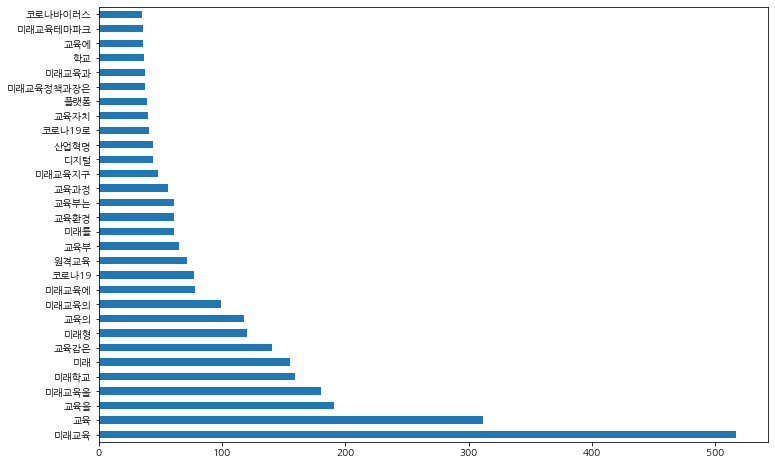

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import rc

rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))
result[0:30].plot(kind='barh')
plt.show()

In [29]:
result

미래교육        517
교육          312
교육을         191
미래교육을       180
미래학교        159
           ... 
변화와           4
콘텐츠가          4
창의미래교육센터      4
자유학년제         4
선물하는          4
Length: 557, dtype: int64